In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [10]:
## open the file and read it 
with open("C:\\Users\\20812018100700\\working\\work\\Hessas_analysis\\Hessas_Mesr_Data\\full_data.txt", encoding='utf-8')as f:
    result = f.read()

In [11]:
## split .txt file 
result = re.split("done [0-9$,.%]+\d*\n", result)

In [4]:
## read DataFrame
df = pd.read_csv("C:\\Users\\20812018100700\\working\\work\\Hessas_analysis\\Hessas_Mesr_Data\\Hesas Misr_coments.csv")

In [8]:
## drop null values
df = df[df["message"].notnull()]

In [13]:
## reset the index of DF
df.reset_index(drop=True, inplace=True)

In [14]:
## slice the DF to the len of our data
df = df.iloc[:len(result), :]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53025 entries, 0 to 53024
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_time  53025 non-null  object
 1   message       53025 non-null  object
 2   id            53025 non-null  object
 3   from          90 non-null     object
dtypes: object(4)
memory usage: 1.6+ MB


In [15]:
## store values in dict 
data = {
        "Translate": [],
        "is_human" : [],
        "sentment" : [],
        "positive" : [], 
        "neutral"  : [],
        "negative" : []
        }

In [16]:
## loop for each value in result list extract is_human 
## if not human: will extract the Translation, Sentment overall rank, sentment score
## else the sentment is nutral/no translation
for i in range(len(result)): 
    iz = re.search('(?<=is human: )(.*)', result[i]).groups()[0]
    data["is_human"].append(iz[0])
    if (iz == "True"):
        data["sentment"].append("neutral")
        data["Translate"].append(result[i].split(" \n\n")[0])
        h = ['positive=0.00', 'neutral=1.00', 'negative=0.00 ']
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])        
                                   
    else:                          
        m = re.search('(?<=Document Sentiment: )(.*)', result[i]).groups()
        data["sentment"].append(m[0])
        
        n = re.search('(?<=Translate: )(.*)', result[i]).groups()
        data["Translate"].append(n[0])
        
        h = str(re.search('(?<=Overall scores: )(.*)', result[i]).groups()[0]).split("; ")
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])
        

In [17]:
## convert dict to dataFrame
df1= pd.DataFrame(data)
df1.sample(10)

,Translate,is_human,sentment,positive,neutral,negative
36821,There is no German language as another foreign...,F,negative,0.07,0.40,0.53
16376,i don't understand,F,neutral,0.01,0.94,0.05
47426,the new vocabulary how we deal with it,F,neutral,0.22,0.76,0.02
13788,Second starter and moral affirmation,F,neutral,0.30,0.63,0.07
19577,the one is sick,F,negative,0.00,0.00,1.00
4230,have not,F,neutral,0.02,0.91,0.07
7393,Omar Alherfa,T,neutral,0.00,1.00,0.00
26138,hh,F,neutral,0.31,0.64,0.05
31931,Leibniz,F,neutral,0.13,0.81,0.06
13861,The priority of the expert and the elimination...,F,neutral,0.38,0.61,0.01


In [18]:
## merge 2 dataFrames into the index
ndf = pd.merge(df, df1, left_index=True, right_index=True)
ndf.head(25)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
0,2021-09-06T04:18:01+0000,Mohammed Adel,271594718130347_271821218107697,NaN,Mohammed Adel,T,neutral,0.00,1.00,0.00
1,2021-09-05T19:13:35+0000,مش بيجي منها حاجة ارحمونا بقى,271594718130347_271610824795403,NaN,Nothing comes of it. Have mercy on us,F,negative,0.21,0.24,0.55
2,2021-09-06T05:06:15+0000,الفيزياء,271594718130347_271840278105791,NaN,Physics,F,neutral,0.13,0.83,0.04
3,2021-09-06T00:02:03+0000,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,271594718130347_271721658117653,NaN,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,T,neutral,0.00,1.00,0.00
4,2021-09-05T19:06:33+0000,نهايه رحله,271594718130347_271608141462338,NaN,the end of the trip,F,neutral,0.10,0.86,0.04
5,2021-09-06T00:49:10+0000,انا مدرسه دراسات ابتدائي واعدادي 01222773055,271594718130347_271737491449403,NaN,I am a primary and preparatory school 01222773055,F,neutral,0.17,0.81,0.02
6,2021-09-05T23:13:38+0000,فين الفيزياء \nلو مفيش فيزياء يبقي انتوا كده م...,271594718130347_271705634785922,NaN,where is physics,F,positive,0.78,0.03,0.19
7,2021-09-06T07:25:28+0000,التظلم فين حضراتك هيظهر امتا اقول اللي وزير في...,271594718130347_271894984766987,NaN,where is the grievance your honor when will it...,F,negative,0.13,0.16,0.71
8,2021-09-06T10:07:18+0000,ولا ليها 60 لازمه و لا بيجى منها حاجه اصلا,271594718130347_271962928093526,NaN,And it has 60 needs and nothing will come of i...,F,neutral,0.00,0.93,0.07
9,2021-09-05T23:03:11+0000,Seif Kamba,271594718130347_271701968119622,NaN,Seif Kamba,T,neutral,0.00,1.00,0.00


In [20]:
ndf.to_csv("Full_DF", index=False)

In [46]:
ndf = pd.read_csv("Full_DF")

In [47]:
ndf.created_time =  ndf["created_time"].str.slice(0, 10)
ndf["date"] = ndf["created_time"].str.slice(0, 7)
ndf.created_time

0        2021-09-06
1        2021-09-05
2        2021-09-06
3        2021-09-06
4        2021-09-05
            ...    
53020    2020-12-11
53021    2020-12-15
53022    2020-12-06
53023    2021-01-10
53024    2021-08-01
Name: created_time, Length: 53025, dtype: object

In [48]:
ndf["created_time"] = pd.to_datetime(ndf["created_time"])
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53025 entries, 0 to 53024
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  53025 non-null  datetime64[ns]
 1   message       53025 non-null  object        
 2   id            53025 non-null  object        
 3   from          90 non-null     object        
 4   Translate     53000 non-null  object        
 5   is_human      53025 non-null  object        
 6   sentment      53025 non-null  object        
 7   positive      53025 non-null  float64       
 8   neutral       53025 non-null  float64       
 9   negative      53025 non-null  float64       
 10  date          53025 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 4.5+ MB


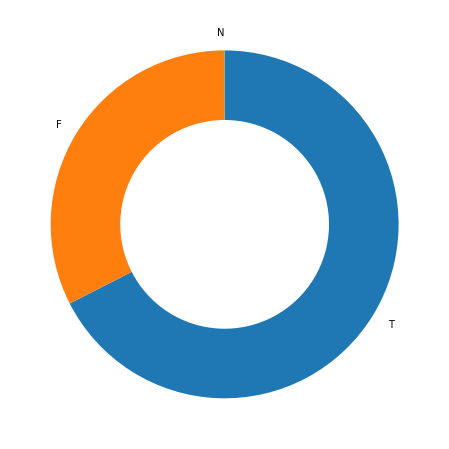

In [54]:
plot = plt.subplots(figsize = (13,8))
plt.pie(ndf.is_human.value_counts(), labels = ndf.is_human.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

In [55]:
ndf.query('is_human  == "T"').sample(10)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,date
37087,2021-06-22,Mervat Aty,215541427069010_1424118334612287,NaN,Mervat Aty,T,neutral,0.0,1.0,0.0,2021-06
21613,2021-07-08,Loly Ayman\nTota Tarek\nسمر محمد,339098197702579_1346487989084987,NaN,Loly Ayman\nTota Tarek\nسمر محمد,T,neutral,0.0,1.0,0.0,2021-07
38692,2021-06-03,Ali Yehia Ibrahim,210979144191905_211347010821785,NaN,Ali Yehia Ibrahim,T,neutral,0.0,1.0,0.0,2021-06
9963,2021-07-17,MUuhamed Tameer,182917770520372_255238435994790,NaN,MUuhamed Tameer,T,neutral,0.0,1.0,0.0,2021-07
34657,2021-06-19,Karim Naser,219507353339084_221572333132586,NaN,Karim Naser,T,neutral,0.0,1.0,0.0,2021-06
21222,2021-07-08,Salmeen Elsheikh,339098197702579_4407196102626277,NaN,Salmeen Elsheikh,T,neutral,0.0,1.0,0.0,2021-07
29806,2021-07-04,Rowan Hesham,338714504419955_338739051084167,NaN,Rowan Hesham,T,neutral,0.0,1.0,0.0,2021-07
45173,2021-02-26,Rawnaa Saber,151880790101741_152560100033810,NaN,Rawnaa Saber,T,neutral,0.0,1.0,0.0,2021-02
7816,2021-07-23,Sama Emad Salma Saad,2935396270067847_301075651800460,NaN,Sama Emad Salma Saad,T,neutral,0.0,1.0,0.0,2021-07
36026,2021-06-11,Mahmoud Hosam,476658276760586_476665160093231,NaN,Mahmoud Hosam,T,neutral,0.0,1.0,0.0,2021-06


In [71]:
info_df=ndf.query('is_human  == "F"')
info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35782 entries, 1 to 53024
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  35782 non-null  datetime64[ns]
 1   message       35782 non-null  object        
 2   id            35782 non-null  object        
 3   from          89 non-null     object        
 4   Translate     35757 non-null  object        
 5   is_human      35782 non-null  object        
 6   sentment      35782 non-null  object        
 7   positive      35782 non-null  float64       
 8   neutral       35782 non-null  float64       
 9   negative      35782 non-null  float64       
 10  date          35782 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 3.3+ MB


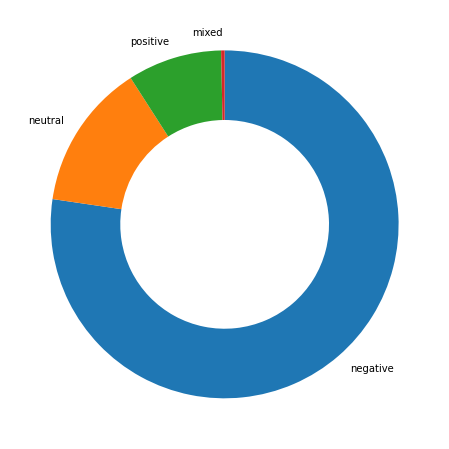

In [72]:
plot = plt.subplots(figsize = (13,8))
plt.pie(info_df.sentment.value_counts(), labels = info_df.sentment.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

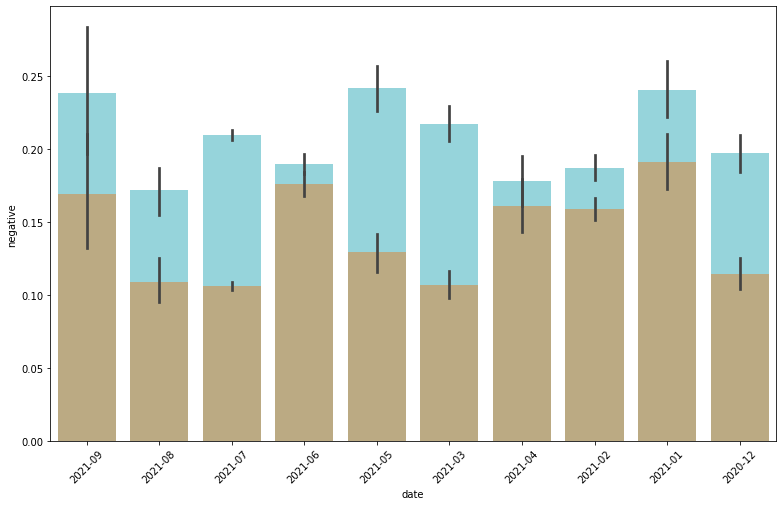

In [73]:
colors = sns.color_palette()
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = info_df, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = info_df, x ="date",  y="negative", color = colors[1], alpha = 0.5)
_ = plt.xticks(rotation=45)

In [75]:
info_df.query('sentment == "negative"').sample(20)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,date
15287,2021-07-08,ما تدخل ف الموضوع بقا ☹️,339098197702579_506702373995834,NaN,"Don't get involved in the topic, then ☹️",F,negative,0.01,0.03,0.96,2021-07
40178,2021-05-19,نفس مضاف الية مجرور بالكسرة,304104271391775_304126518056217,NaN,The same addition of a broken-up,F,negative,0.00,0.00,1.00,2021-05
46382,2021-02-22,Blew,3794367117310529_3794421440638430,NaN,Blew,F,negative,0.00,0.01,0.99,2021-02
47969,2021-02-19,فين الصور اصلا مافيش صوت خاااااااالص,181819439988128_137825174857967,NaN,Where are the pictures originally there is no ...,F,negative,0.01,0.37,0.62,2021-02
46655,2021-02-23,Blew,3794367117310529_1172426553194021,NaN,Blew,F,negative,0.00,0.01,0.99,2021-02
38039,2021-06-07,ليه الفيديوهات مش بتفتح؟,213040380652448_214203287202824,NaN,Why don't videos open?,F,negative,0.02,0.22,0.76,2021-06
17950,2021-07-08,بدل يبرووووو,339098197702579_187058356709282,NaN,Instead of justifying,F,negative,0.01,0.24,0.75,2021-07
18351,2021-07-08,اللي مش فاهم يريأكت يشبااااااااااب.,339098197702579_187050526710065,NaN,"Who doesn't understand, he should be suspicious.",F,negative,0.00,0.00,1.00,2021-07
40244,2021-05-19,وفاه ابنهما,304104271391775_496164048172259,NaN,Their son died.,F,negative,0.00,0.00,1.00,2021-05
42728,2021-03-31,طيب بالنسبة للمقال,3147163552054058_3147249258712154,NaN,Ok about the article,F,negative,0.05,0.33,0.62,2021-03
